# Code to Split CSV if Necessary

In [1]:
# From https://gist.github.com/jrivero/1085501
import os

def split(filehandler, delimiter=',', row_limit=10000, 
    output_name_template='output_%s.csv', output_path='.', keep_headers=True):
    """
    Splits a CSV file into multiple pieces.
    
    A quick bastardization of the Python CSV library.

    Arguments:

        `row_limit`: The number of rows you want in each output file. 10,000 by default.
        `output_name_template`: A %s-style template for the numbered output files.
        `output_path`: Where to stick the output files.
        `keep_headers`: Whether or not to print the headers in each output file.

    Example usage:
    
        >> from toolbox import csv_splitter;
        >> csv_splitter.split(open('/home/ben/input.csv', 'r'));
    
    """
    import csv
    reader = csv.reader(filehandler, delimiter=delimiter)
    current_piece = 1
    current_out_path = os.path.join(
         output_path,
         output_name_template  % current_piece
    )
    current_out_writer = csv.writer(open(current_out_path, 'w'), delimiter=delimiter)
    current_limit = row_limit
    if keep_headers:
#         headers = reader.next()
        headers = next(reader)
        current_out_writer.writerow(headers)
    for i, row in enumerate(reader):
        if i + 1 > current_limit:
            current_piece += 1
            current_limit = row_limit * current_piece
            current_out_path = os.path.join(
               output_path,
               output_name_template  % current_piece
            )
            current_out_writer = csv.writer(open(current_out_path, 'w'), delimiter=delimiter)
            if keep_headers:
                current_out_writer.writerow(headers)
        current_out_writer.writerow(row)

# Import CSV File after Converting to UTF-8 Format

In [1]:
import pandas as pd

BER_df = pd.read_csv('BERPublicsearch (UTF-8).csv')
BER_df.head(1000)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (61,62,63,64,65,66,71,73,97,98,139,144,150,155,161,166) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,...,SecondWallIsSemiExposed,SecondWallAgeBandId,SecondWallTypeId,ThirdWallType_Description,ThirdWallDescription,ThirdWallArea,ThirdWallUValue,ThirdWallIsSemiExposed,ThirdWallAgeBandId,ThirdWallTypeId
0,Co. Clare,Detached house,2004,Existing,C2,191.77,213.98,0.55,0.35,0.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Co. Waterford,Mid-terrace house,2006,Existing,C1,173.95,73.00,0.37,0.16,0.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Co. Kildare,Semi-detached house,1987,Existing,C3,206.65,83.40,0.60,0.16,0.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Co. Dublin,Semi-detached house,1910,Existing,D2,292.51,269.28,2.10,1.27,0.62,...,No,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Co. Clare,House,1984,Existing,E2,362.62,120.81,0.31,0.13,0.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Waterford City,Maisonette,2006,Existing,D2,264.52,78.27,0.41,0.35,0.00,...,No,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,Dublin 16,Semi-detached house,1953,Existing,C1,156.17,160.00,0.34,0.17,0.45,...,No,10.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,Co. Tipperary,Semi-detached house,1994,Existing,C2,199.78,118.71,0.27,0.13,0.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,Waterford City,Maisonette,2006,Existing,D1,230.67,78.27,0.55,0.35,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Get Some Basic Properties from the Data

,CountyName,DwellingTypeDescr,Year_of_Construction,TypeofRating,EnergyRating,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,...,SecondWallIsSemiExposed,SecondWallAgeBandId,SecondWallTypeId,ThirdWallType_Description,ThirdWallDescription,ThirdWallArea,ThirdWallUValue,ThirdWallIsSemiExposed,ThirdWallAgeBandId,ThirdWallTypeId
924996,Co. Offaly,Detached house,1981,Existing,D2,272.87,73.00,1.10,0.20,0.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488935,Waterford City,Top-floor apartment,1996,Existing,C2,196.80,85.63,0.67,0.40,0.00,...,No,8.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410646,Co. Kildare,Top-floor apartment,2007,Existing,C2,183.17,79.00,0.58,0.25,0.00,...,No,10.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
820339,Co. Louth,Mid-terrace house,1965,Existing,C1,163.79,88.18,1.00,0.13,0.81,...,No,4.0,2.0,300mm Filled Cavity,Original,8.89,0.3,No,4.0,5.0
504712,Co. Cork,Semi-detached house,1995,Existing,C3,221.64,79.02,0.25,0.13,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495893,Co. Wicklow,Ground-floor apartment,1930,Existing,F,423.62,52.79,1.30,0.49,0.72,...,No,3.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579766,Co. Laois,Ground-floor apartment,2005,Existing,D1,238.04,73.01,0.37,0.00,0.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
704677,Co. Tipperary,Semi-detached house,1998,Existing,C3,204.46,108.10,0.55,0.40,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339994,Co. Meath,Detached house,2004,Existing,C2,180.41,262.15,0.55,0.23,0.41,...,Yes,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Year_of_Construction,BerRating,GroundFloorArea(sq m),UValueWall,UValueRoof,UValueFloor,UValueWindow,UvalueDoor,WallArea,RoofArea,...,FirstWallAgeBandId,FirstWallTypeId,SecondWallArea,SecondWallUValue,SecondWallAgeBandId,SecondWallTypeId,ThirdWallArea,ThirdWallUValue,ThirdWallAgeBandId,ThirdWallTypeId
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9777.000000,9972.000000,4805.000000,4805.000000,4694.000000,4797.000000,1739.000000,1739.000000,1685.000000,1734.000000
mean,1982.938900,245.076272,112.677568,0.676988,0.385146,0.439669,2.663356,2.435522,93.884126,69.760814,...,6.604684,5.690634,23.497074,0.767984,6.745420,6.609756,14.951791,0.817134,6.360237,6.230104
std,33.426344,150.243053,58.678307,0.569011,0.513088,0.247816,0.843742,1.016405,53.851044,49.031263,...,3.077509,2.779255,18.300914,0.601386,2.980038,3.392870,11.177020,0.664034,2.969594,3.076931
min,1760.000000,-3.540000,10.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.060000,0.020000,0.000000,1.000000,0.110000,0.120000,0.000000,1.000000
25%,1973.000000,162.812500,77.230000,0.310000,0.130000,0.310000,2.200000,2.130000,54.470000,42.300000,...,5.000000,4.000000,11.680000,0.360000,5.000000,4.000000,6.700000,0.370000,4.000000,4.000000
50%,1996.000000,213.680000,99.635000,0.520000,0.220000,0.420000,2.700000,3.000000,87.320000,58.710000,...,7.000000,5.000000,19.540000,0.550000,7.000000,6.000000,12.750000,0.550000,7.000000,6.000000
75%,2005.000000,292.502500,131.740000,0.640000,0.400000,0.610000,3.060000,3.000000,114.847500,89.605000,...,9.000000,8.000000,30.300000,1.130000,9.000000,9.000000,20.035000,1.230000,9.000000,8.000000
max,2021.000000,1886.410000,727.300000,3.450000,3.510000,1.230000,5.700000,5.380000,495.900000,483.660000,...,11.000000,14.000000,212.510000,3.910000,11.000000,14.000000,76.220000,4.800000,11.000000,14.000000


Co. Cork          83526
Co. Dublin        71662
Co. Kildare       41268
Co. Galway        36729
Co. Meath         35918
Co. Wexford       30740
Co. Tipperary     29853
Co. Kerry         29732
Co. Donegal       28666
Co. Wicklow       27946
Co. Louth         26811
Co. Limerick      24896
Co. Mayo          24837
Co. Clare         23470
Cork City         22737
Dublin 15         22467
Co. Westmeath     16787
Dublin 24         16537
Limerick City     16126
Co. Kilkenny      15050
Co. Sligo         14554
Dublin 8          14285
Co. Laois         14258
Co. Waterford     14199
Galway City       14097
Co. Cavan         13800
Co. Carlow        12505
Co. Offaly        12318
Dublin 11         11686
Dublin 7          11610
Dublin 18         11139
Co. Roscommon     11074
Dublin 9          10914
Dublin 4          10751
Dublin 12         10384
Waterford City    10296
Dublin 14          9891
Dublin 16          9433
Co. Monaghan       8865
Dublin 6           8707
Dublin 5           8688
Dublin 3        

Num Region:  55


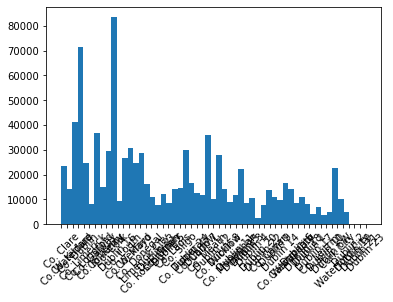

Num Rows BER_df:  937488


Co. Cork          896
Co. Dublin        710
Co. Kildare       444
Co. Galway        405
Co. Meath         404
Co. Wexford       345
Co. Kerry         343
Co. Donegal       330
Co. Louth         313
Co. Tipperary     307
Co. Wicklow       294
Co. Mayo          279
Co. Limerick      259
Cork City         249
Dublin 15         235
Co. Clare         234
Co. Kilkenny      186
Dublin 24         171
Co. Laois         156
Co. Westmeath     156
Co. Cavan         154
Co. Waterford     152
Limerick City     151
Dublin 8          146
Co. Offaly        143
Co. Sligo         141
Co. Carlow        141
Galway City       141
Dublin 18         131
Co. Roscommon     127
Dublin 11         120
Dublin 9          114
Dublin 12         112
Waterford City    112
Dublin 7          111
Dublin 4          105
Dublin 14          97
Dublin 3           92
Co. Monaghan       90
Dublin 16          90
Dublin 1           87
Dublin 6           85
Dublin 5           85
Dublin 13          80
Co. Leitrim        78
Co. Longfo

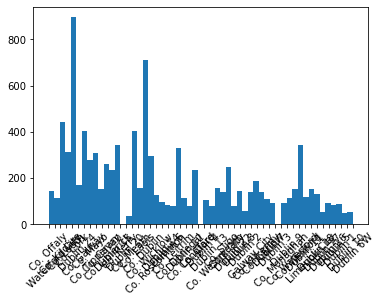

Num Rows BER_df_10k:  10000


In [13]:
import matplotlib.pyplot as plt

# Get random subset of 10000 records.
BER_df_10k = BER_df.sample(n=10000)

# Display a few rows.
display(BER_df_10k)

# Get summary data for numerical features.
display(BER_df_10k.describe())

# Number of records per region.
region_counts = BER_df['CountyName'].value_counts()
display(num_region)
num_regions = len(region_counts)
print('Num Region: ', num_regions)

# Get bar chart of counties for all data.
p = plt.hist(BER_df['CountyName'], bins=num_regions)
plt.xticks(rotation=45)
plt.show()

print('Num Rows BER_df: ', str(len(BER_df)))

# Show number of records per county for data subset.
display(BER_df_10k['CountyName'].value_counts())

# Get bar chart of counties for data subset.
p = plt.hist(BER_df_10k['CountyName'], bins=num_regions)
plt.xticks(rotation=45)
plt.show()

print('Num Rows BER_df_10k: ', str(len(BER_df_10k)))
